In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tensorflow")
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

## Binary Classification
### Movie review
determine positive or negative review

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

from keras.datasets import imdb
from keras.preprocessing import sequence

Скачиваем данные, проверяем и подготавливаем их.

Review 1:

? this is one of the greatest love story movies i have ever seen yes i can agree that some parts may seem dated but this does not distract from the film one should try to observe criticize and enjoy any art form from the perspective of the time clearly by the sex in the city standards charlie chaplin was horribly boring however when judged from the prospective of 1925 america he was fantastic likewise sayonara is a breakthrough film in its look into a mixed race love affair american manifest destiny arrogance and prejudice and the complexity of different cultures it is a natural next step to such films as gentleman's agreement its purpose however was not just social commentary rather it is entertaining and enjoyable with innumerable lines that one just doesn't forget br br however even when taken only as a love story it is terrific although some attack brando's accent he is at his near best in nuance and characterization buttons and umeki who both won oscars and the rest of 

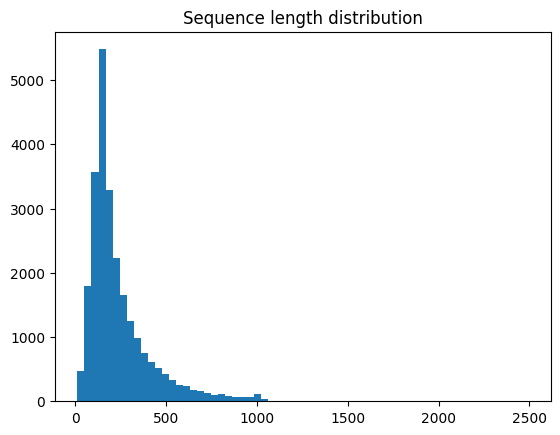

Number of positive reviews: 12500
Number of negative reviews: 12500


In [4]:
word_index = imdb.get_word_index()

MAX_FEATURES = len(word_index)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)

# Reverse the word index to get words from indices
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the reviews
def decode_review(sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])

# Print some reviews to the terminal
num_reviews_to_print = 1
for i in range(num_reviews_to_print):
    review_index = np.random.randint(0, len(x_train))
    print(f"Review {i + 1}:\n")
    print(decode_review(x_train[review_index]))
    print("\nSentiment (0: Negative, 1: Positive):", y_train[review_index])
    print(len(x_train[review_index]), "words")
    print("\n" + "=" * 50 + "\n")

MAX_LEN = 100

plt.title('Sequence length distribution')
plt.hist(list(map(len, x_train)),bins=64)
plt.show()

# Pad the sequences to the same length
x_train = sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_LEN)

positive_reviews = sum(y_train)
negative_reviews = len(y_train) - positive_reviews
print("Number of positive reviews:", positive_reviews)
print("Number of negative reviews:", negative_reviews)

In [5]:
from callback import PlotLossCallback

from keras.callbacks import LearningRateScheduler
import tensorflow as tf
from keras import layers, models
import time

Определим функцию для обучения модели

In [6]:
def train(model: models.Sequential, epochs=5, batch_size=32, verbose=1, lr=0.001, lr_schedule=1.0, val_split=0.15):
    def lr_func(epoch):
        return lr * (lr_schedule ** epoch)

    time_start = time.time()
    
    history = model.fit(
        x=x_train, y=y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=verbose,
        callbacks=[PlotLossCallback(batch_size / (len(x_train) * (1.0 - val_split))),
                  LearningRateScheduler(lr_func)],
        validation_split=val_split)
    
    _, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    print(f'Training time: {time.time() - time_start} seconds')

    return history

Первая модель

In [7]:
from keras.optimizers import Adam

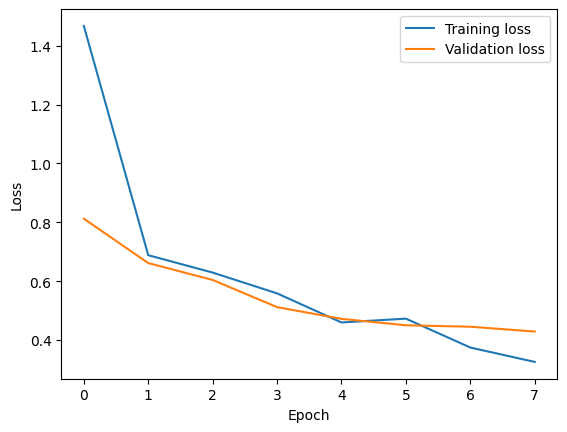

782/782 [==============================] - 17s 22ms/step - loss: 0.4411 - accuracy: 0.8329
Test accuracy: 0.8328800201416016
Training time: 422.8509566783905 seconds


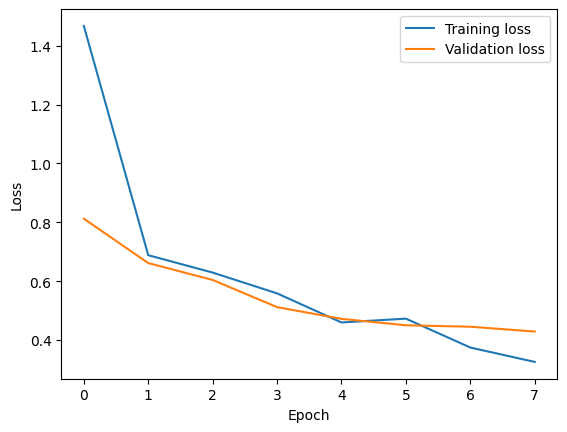

In [8]:
learning_rate = 0.0001
def CreateModelType_1():
    model = models.Sequential()
    model.add(layers.Embedding(
                    input_dim=MAX_FEATURES,
                    output_dim=64,
                    mask_zero=True))
    model.add(layers.Bidirectional(layers.LSTM(
                    units=64,
                    dropout=0.1,
                    recurrent_dropout=0.4)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

train(CreateModelType_1(), epochs=8, batch_size=128, verbose=1, lr=learning_rate, lr_schedule=0.9)



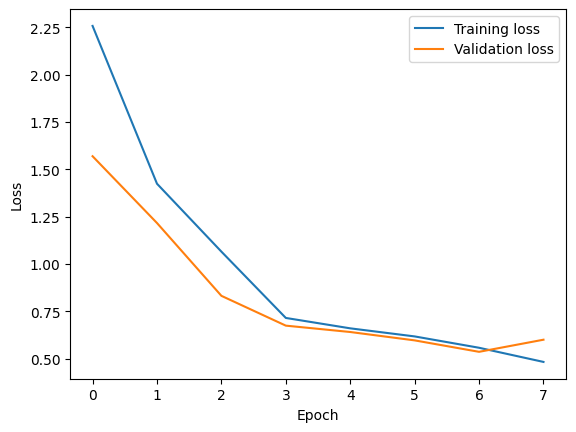

782/782 [==============================] - 67s 86ms/step - loss: 0.5805 - accuracy: 0.7900
Test accuracy: 0.7900400161743164
Training time: 1229.3047471046448 seconds


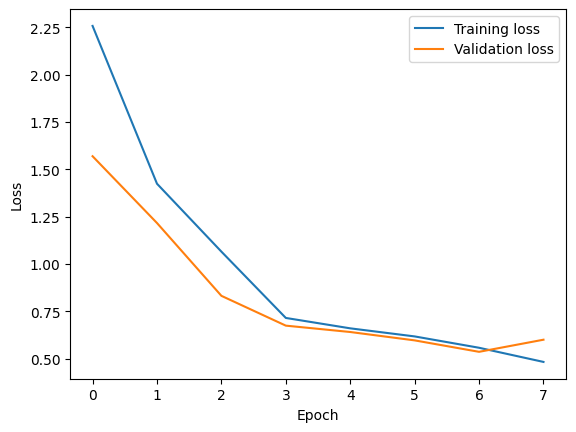

In [9]:
learning_rate = 0.0001
def CreateModelType_2():
    model = models.Sequential()
    model.add(layers.Embedding(
                    input_dim=MAX_FEATURES,
                    output_dim=64,
                    mask_zero=True))
    model.add(layers.Bidirectional(layers.LSTM(
                    units=64,
                    dropout=0.2,
                    recurrent_dropout=0.6,
                    return_sequences=True)))
    model.add(layers.Bidirectional(layers.LSTM(
                    units=32,
                    dropout=0.2,
                    recurrent_dropout=0.6,
                    return_sequences=False)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

train(CreateModelType_2(), epochs=8, batch_size=128, verbose=1, lr=learning_rate, lr_schedule=0.9)

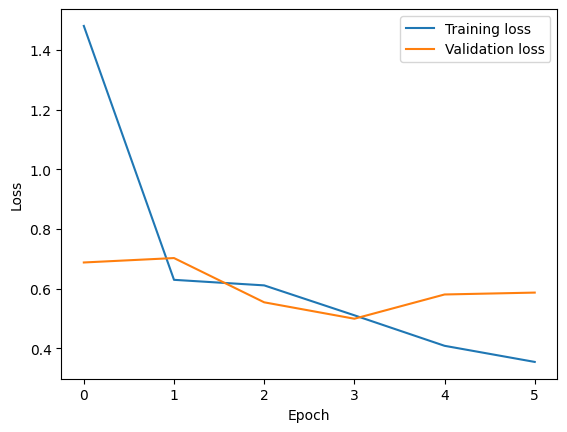

782/782 [==============================] - 34s 43ms/step - loss: 0.5896 - accuracy: 0.7946
Test accuracy: 0.7946000099182129
Training time: 417.49275517463684 seconds


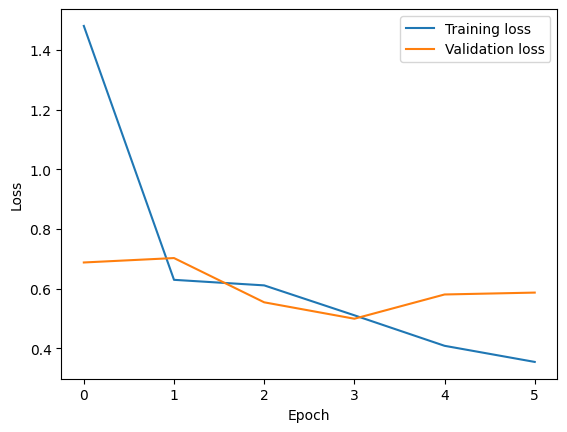

In [10]:
learning_rate = 0.0001
def CreateModelType_3():
    model = models.Sequential()
    model.add(layers.Embedding(
                    input_dim=MAX_FEATURES,
                    output_dim=64,
                    mask_zero=True))
    model.add(layers.LSTM(
                    units=64,
                    return_sequences=True))
    model.add(layers.LSTM(
                    units=64,
                    go_backwards=True,
                    return_sequences=False))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

train(CreateModelType_3(), epochs=6, batch_size=128, verbose=1, lr=learning_rate, lr_schedule=0.9)

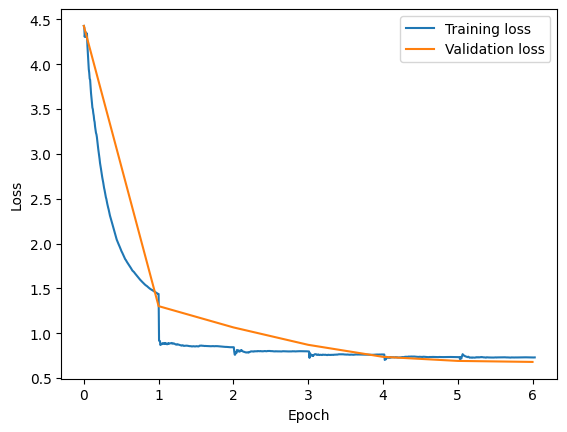

782/782 [==============================] - 19s 25ms/step - loss: 0.6845 - accuracy: 0.5556
Test accuracy: 0.5556399822235107
Training time: 461.4763734340668 seconds


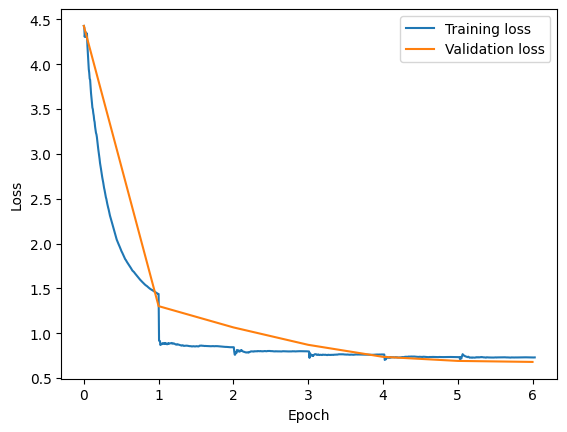

In [20]:
learning_rate = 0.0001
def CreateModelType_3():
    model = models.Sequential()
    model.add(layers.Embedding(
                    input_dim=MAX_FEATURES,
                    output_dim=64,
                    mask_zero=True))
    model.add(layers.LSTM(
                    units=64,
                    return_sequences=True))
    model.add(layers.LSTM(
                    units=64,
                    go_backwards=True,
                    return_sequences=False))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

train(CreateModelType_3(), epochs=6, batch_size=128, verbose=1, lr=learning_rate, lr_schedule=0.9)